In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

In [27]:
url = 'https://raw.githubusercontent.com/kucingku-capstone/machine-learning/main/dataset/cats_dataset_updated.csv'
df = pd.read_csv(url)

In [30]:
# Assuming 'Breed' is the column containing cat breeds
breed_counts = df['breed'].value_counts()

# Take the top 50 breeds
top_50_breeds = breed_counts.head(50).index

# Create a new DataFrame with 50% reduction for each breed
sampled_data = pd.DataFrame()
for breed in top_50_breeds:
    breed_data = df[df['breed'] == breed].sample(frac=0.5, random_state=42)  # Adjust the random_state if needed
    sampled_data = pd.concat([sampled_data, breed_data])

# Print the shape of the new sampled DataFrame
print("Shape of Sampled DataFrame:", sampled_data.shape)

# Display the new sampled dataset
print("Sampled Dataset:")
print(sampled_data)

Shape of Sampled DataFrame: (34688, 13)
Sampled Dataset:
       Unnamed: 0    cat_id  \
29685       31330  46743754   
28675       30318  46750373   
32435       34085  46722526   
32049       33696  46725832   
31732       33379  46728797   
...           ...       ...   
14272       15557  41835694   
14308       15593  32014398   
14378       15663  18561969   
14343       15628  24633479   
14292       15577  36367826   

                                                     url type     age  gender  \
29685  https://www.petfinder.com/cat/mochi-46743754/m...  Cat   Adult  Female   
28675  https://www.petfinder.com/cat/cleopatra-467503...  Cat    Baby  Female   
32435  https://www.petfinder.com/cat/buttons-46722526...  Cat    Baby    Male   
32049  https://www.petfinder.com/cat/vator-46725832/n...  Cat    Baby    Male   
31732  https://www.petfinder.com/cat/numa-46728797/tx...  Cat    Baby  Female   
...                                                  ...  ...     ...     ...   
142

In [31]:
# Drop the specified columns from the sampled dataset
columns_to_drop = ['Unnamed: 0', 'url', 'photos', 'med_photos']
sampled_data = sampled_data.drop(columns=columns_to_drop)

# Print the shape of the modified sampled DataFrame
print("Shape of Modified Sampled DataFrame:", sampled_data.shape)

# Display the modified sampled dataset
print("Modified Sampled Dataset:")
print(sampled_data)


Shape of Modified Sampled DataFrame: (34688, 9)
Modified Sampled Dataset:
         cat_id type     age  gender    size      coat                breed  \
29685  46743754  Cat   Adult  Female  Medium     Short  Domestic Short Hair   
28675  46750373  Cat    Baby  Female  Medium     Short  Domestic Short Hair   
32435  46722526  Cat    Baby    Male   Small     Short  Domestic Short Hair   
32049  46725832  Cat    Baby    Male  Medium     Short  Domestic Short Hair   
31732  46728797  Cat    Baby  Female   Small     Short  Domestic Short Hair   
...         ...  ...     ...     ...     ...       ...                  ...   
14272  41835694  Cat   Adult    Male  Medium  Hairless            Devon Rex   
14308  32014398  Cat   Young  Female  Medium     Short            Devon Rex   
14378  18561969  Cat   Adult  Female  Medium     Short            Devon Rex   
14343  24633479  Cat  Senior    Male   Large     Short            Devon Rex   
14292  36367826  Cat    Baby  Female   Small     Short   

In [33]:
# Save the modified sampled dataset to a new CSV file
sampled_data.to_csv('sampled_dataset.csv', index=False)

# Replace 'path_to_save' with the actual path where you want to save the file


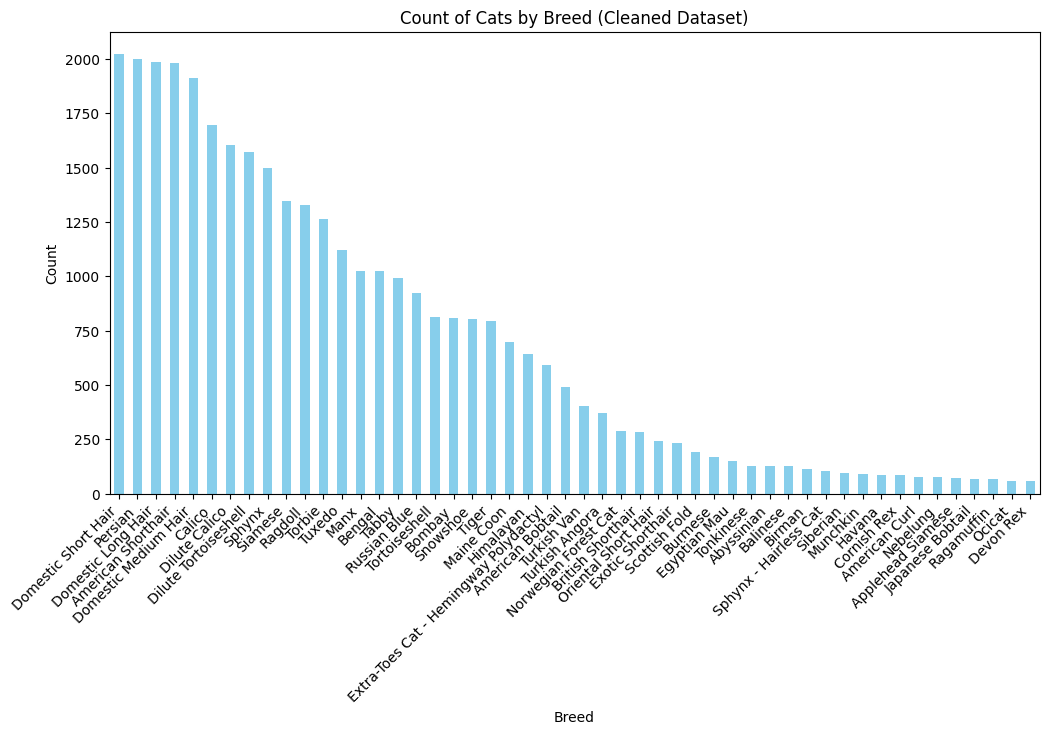

In [34]:
import matplotlib.pyplot as plt

# Assuming 'breed' is the column containing cat breeds in the cleaned dataset
breed_counts_cleaned = sampled_data['breed'].value_counts()

# Plotting the count of cats by breed
plt.figure(figsize=(12, 6))
breed_counts_cleaned.plot(kind='bar', color='skyblue')
plt.title('Count of Cats by Breed (Cleaned Dataset)')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [40]:
# Assuming 'breed' is the column containing cat breeds in the cleaned dataset
breed_counts_cleaned = sampled_data['breed'].value_counts().head(15)

# Print the count of the top 15 breeds
print("Count of Cats by Top 15 Breeds:")
print(breed_counts_cleaned)


Count of Cats by Top 15 Breeds:
Domestic Short Hair     2024
Persian                 2000
Domestic Long Hair      1984
American Shorthair      1982
Domestic Medium Hair    1910
Calico                  1694
Dilute Calico           1606
Dilute Tortoiseshell    1572
Sphynx                  1500
Siamese                 1348
Ragdoll                 1328
Torbie                  1262
Tuxedo                  1120
Manx                    1024
Bengal                  1022
Name: breed, dtype: int64


In [41]:
import pandas as pd

# Assuming 'breed' is the column containing cat breeds in the cleaned dataset
breed_counts_cleaned = sampled_data['breed'].value_counts().head(15)

# Take the top 15 breeds
top_15_breeds = breed_counts_cleaned.index

# Create a new DataFrame with 50% reduction for each of the top 15 breeds
reduced_data = pd.DataFrame()
for breed in top_15_breeds:
    breed_data = sampled_data[sampled_data['breed'] == breed].sample(frac=0.5, random_state=42)  # Adjust the random_state if needed
    reduced_data = pd.concat([reduced_data, breed_data])

# Print the shape of the reduced DataFrame
print("Shape of Reduced DataFrame:", reduced_data.shape)

# Print the count of cats by breed in the reduced dataset
print("Count of Cats by Breed in Reduced Dataset:")
print(reduced_data['breed'].value_counts())


Shape of Reduced DataFrame: (11688, 9)
Count of Cats by Breed in Reduced Dataset:
Domestic Short Hair     1012
Persian                 1000
Domestic Long Hair       992
American Shorthair       991
Domestic Medium Hair     955
Calico                   847
Dilute Calico            803
Dilute Tortoiseshell     786
Sphynx                   750
Siamese                  674
Ragdoll                  664
Torbie                   631
Tuxedo                   560
Manx                     512
Bengal                   511
Name: breed, dtype: int64


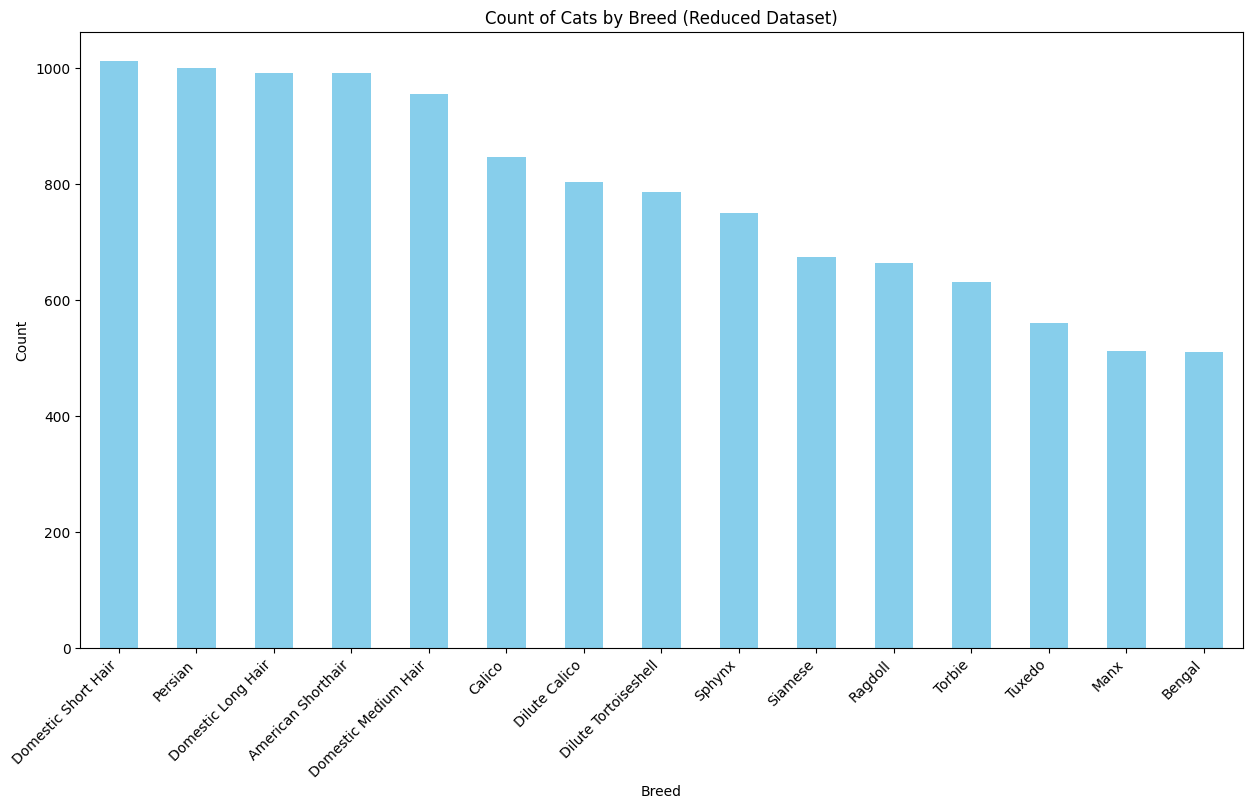

In [43]:
import matplotlib.pyplot as plt

# Assuming 'breed' is the column containing cat breeds in the reduced dataset
breed_counts_reduced = reduced_data['breed'].value_counts()

# Plotting the count of cats by breed in the reduced dataset for all breeds
plt.figure(figsize=(15, 8))
breed_counts_reduced.plot(kind='bar', color='skyblue')
plt.title('Count of Cats by Breed (Reduced Dataset)')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


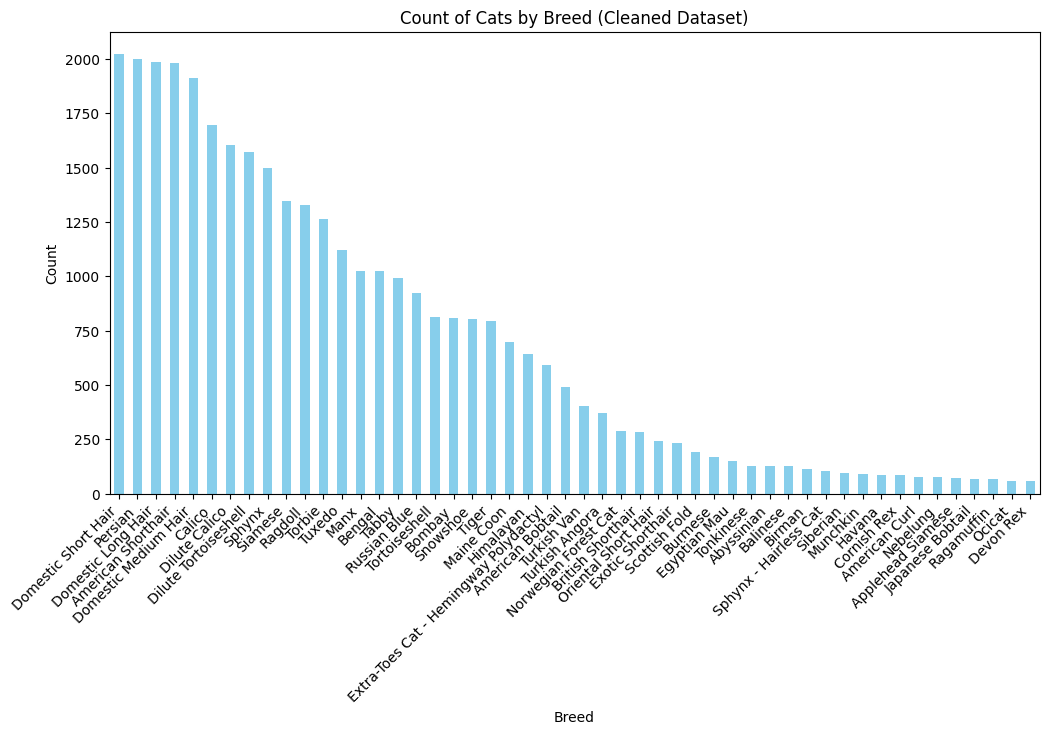

In [44]:
# Assuming 'breed' is the column containing cat breeds in the cleaned dataset
breed_counts_reduced = sampled_data['breed'].value_counts()

# Plotting the count of cats by breed
plt.figure(figsize=(12, 6))
breed_counts_reduced.plot(kind='bar', color='skyblue')
plt.title('Count of Cats by Breed (Cleaned Dataset)')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
# Assuming 'breed' is the column containing cat breeds in the cleaned dataset
breed_counts_reduced = sampled_data['breed'].value_counts()

# Convert value counts to a DataFrame
breed_counts_table = pd.DataFrame({'Breed': breed_counts_reduced.index, 'Count': breed_counts_reduced.values})

# Display the table
print("Count of Cats by Breed (Cleaned Dataset):")
print(breed_counts_table)


Count of Cats by Breed (Cleaned Dataset):
                                    Breed  Count
0                     Domestic Short Hair   2024
1                                 Persian   2000
2                      Domestic Long Hair   1984
3                      American Shorthair   1982
4                    Domestic Medium Hair   1910
5                                  Calico   1694
6                           Dilute Calico   1606
7                    Dilute Tortoiseshell   1572
8                                  Sphynx   1500
9                                 Siamese   1348
10                                Ragdoll   1328
11                                 Torbie   1262
12                                 Tuxedo   1120
13                                   Manx   1024
14                                 Bengal   1022
15                                  Tabby    994
16                           Russian Blue    921
17                          Tortoiseshell    812
18                         

In [46]:
# Save the sampled_data DataFrame to a CSV file
sampled_data.to_csv('sampled_dataset_with_counts.csv', index=False)
